In [103]:
import os
import sys
import xarray as xr
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import warnings
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [4]:
warnings.filterwarnings('ignore')

In [7]:
data_track = xr.open_dataset('/scratch/wmtsai/temp_mcs/mcs_stats/mcs_tracks_final_extc_20190101.0000_20200101.0000.nc')
data_mask = xr.open_dataset('/scratch/wmtsai/temp_mcs/mcstrack_20190125_1230.nc')
data_mask2 = xr.open_dataset('/scratch/wmtsai/temp_mcs/mcstrack_20190125_1430.nc')

In [37]:
mask_sub = data_mask.sel(lat=slice(-50,-25), lon=slice(-80,-50)).isel(time=0)
mask_sub2 = data_mask2.sel(lat=slice(-50,-25), lon=slice(-80,-50)).isel(time=0)

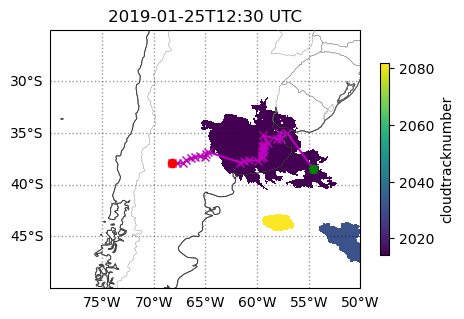

In [99]:
# plotting section
# CACTI domain 31.25 S-33.25 S; 65.75 W - 63.5 W

fig, ax = plt.subplots(1,1,figsize=(5,5),subplot_kw={'projection': ccrs.PlateCarree()})
        
ax.coastlines(color='k',linewidth=0.7)
ax.add_feature(cfeat.LAND,zorder=3,edgecolor='grey',facecolor='none',linewidth=0.3) # maskout LAND
ax.add_feature(cfeat.BORDERS,zorder=3,edgecolor='grey',facecolor='none',linewidth=0.3)
ax.add_feature(cfeat.STATES,zorder=3,edgecolor='grey',facecolor='none',linewidth=0.3) 

cp = ax.pcolormesh(mask_sub.lon, mask_sub.lat, mask_sub.cloudtracknumber_nomergesplit, transform=ccrs.PlateCarree())
cbar = plt.colorbar(cp,ax=ax, shrink=0.5)
cbar.set_label('cloudtracknumber',fontsize=10)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='k', alpha=0.4, linestyle=':')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax.set_title(str(mask_sub.time.values)[:16] + ' UTC')

# plot trajectory of track 2015
track_sub = data_track.sel(tracks=2013)
ax.plot(track_sub.meanlon, track_sub.meanlat, color='m', marker='x')
ax.plot(track_sub.meanlon[0], track_sub.meanlat[0], color='r', marker='o')
idx = np.where(np.isnan(track_sub.meanlon))[0][0] # end point
ax.plot(track_sub.meanlon[idx-1], track_sub.meanlat[idx-1], color='g', marker='o')

plt.show()

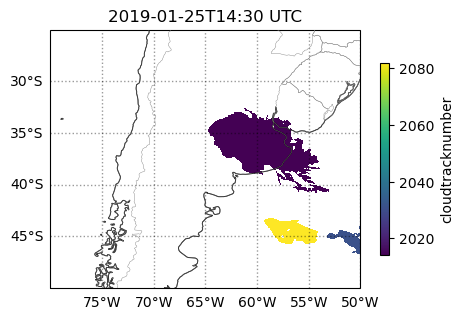

In [38]:
# plotting section
# CACTI domain 31.25 S-33.25 S; 65.75 W - 63.5 W

fig, ax = plt.subplots(1,1,figsize=(5,5),subplot_kw={'projection': ccrs.PlateCarree()})
        
ax.coastlines(color='k',linewidth=0.7)
ax.add_feature(cfeat.LAND,zorder=3,edgecolor='grey',facecolor='none',linewidth=0.3) # maskout LAND
ax.add_feature(cfeat.BORDERS,zorder=3,edgecolor='grey',facecolor='none',linewidth=0.3)
ax.add_feature(cfeat.STATES,zorder=3,edgecolor='grey',facecolor='none',linewidth=0.3) 

cp = ax.pcolormesh(mask_sub2.lon, mask_sub2.lat, mask_sub2.cloudtracknumber_nomergesplit, transform=ccrs.PlateCarree())
cbar = plt.colorbar(cp,ax=ax, shrink=0.5)
cbar.set_label('cloudtracknumber',fontsize=10)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='k', alpha=0.4, linestyle=':')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax.set_title(str(mask_sub2.time.values)[:16] + ' UTC')

plt.show()

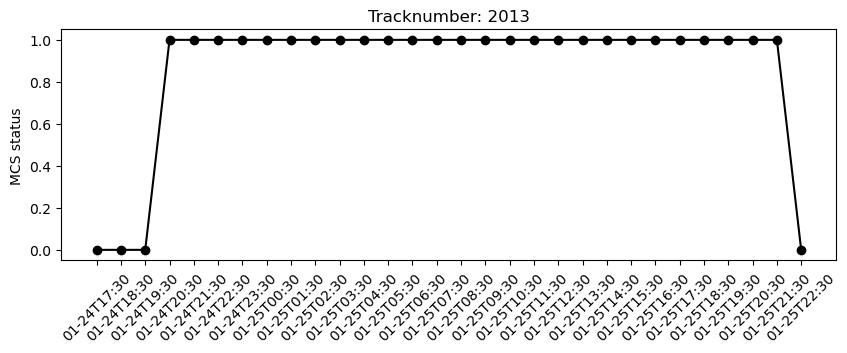

In [100]:
# track number: 2014-1 = 2013, b.c. track starts from 0
track_sub = data_track.sel(tracks=2013)
avg_rain = track_sub.total_rain/(track_sub.ccs_area/625)

fig, ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(track_sub.base_time[:70], track_sub.mcs_status[:70], '-ok')
ax.set_xticks(track_sub.base_time.values[:70]);

str_list = []
for x in track_sub.base_time.values[:70]:
    str_list.extend([str(x)[5:16]])
ax.set_xticklabels(str_list, rotation=45);
ax.set_title('Tracknumber: 2013')
ax.set_ylabel('MCS status',fontsize=10)
plt.show()

In [101]:
# quick look at GPM feautre-precip dataset

data_fp = xr.open_dataset('/scratch/wmtsai/GPM_feature_precip/2019/GPM-IMERG_feature_precip_2019_01.nc')

In [121]:
data_fp_sub = data_fp.sel(time=datetime(2019,1,25,12)
                          , latitude=slice(-50,-25), longitude=slice(360-80,360-50)).precip_id

In [122]:
data_fp_sub = data_fp_sub.where(data_fp_sub > 0)

In [117]:
flag = ['AR','FT','MCS','LPS','AF','AM','AL','FM','FL','ML','AFM','AFL','AML','FML','UE','All','DC','ND','ST','DZ']

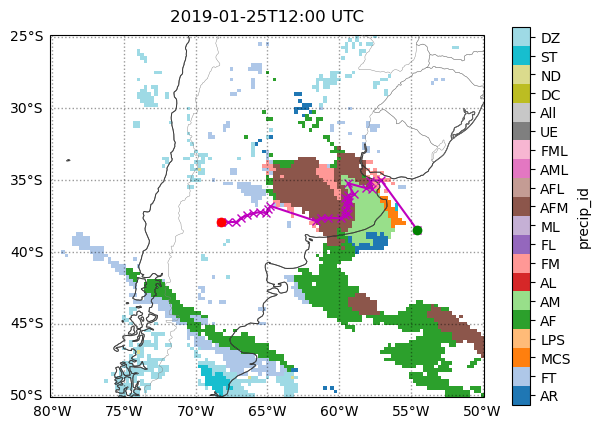

In [125]:
# plotting section
# CACTI domain 31.25 S-33.25 S; 65.75 W - 63.5 W

fig, ax = plt.subplots(1,1,figsize=(7,7),subplot_kw={'projection': ccrs.PlateCarree()})
        
ax.coastlines(color='k',linewidth=0.7)
ax.add_feature(cfeat.LAND,zorder=3,edgecolor='grey',facecolor='none',linewidth=0.3) # maskout LAND
ax.add_feature(cfeat.BORDERS,zorder=3,edgecolor='grey',facecolor='none',linewidth=0.3)
ax.add_feature(cfeat.STATES,zorder=3,edgecolor='grey',facecolor='none',linewidth=0.3) 

cp = ax.pcolormesh(data_fp_sub.longitude, data_fp_sub.latitude, data_fp_sub, transform=ccrs.PlateCarree(),
                  cmap='tab20', vmin=1, vmax=21)
cbar = plt.colorbar(cp,ax=ax, shrink=0.7)
cbar.set_label('precip_id',fontsize=10)
cbar.set_ticks(np.arange(1.5,21.5,1))
cbar.set_ticklabels(flag)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='k', alpha=0.4, linestyle=':')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax.set_title(str(data_fp_sub.time.values)[:16] + ' UTC')

# plot trajectory of track 2015
track_sub = data_track.sel(tracks=2013)
ax.plot(track_sub.meanlon, track_sub.meanlat, color='m', marker='x')
ax.plot(track_sub.meanlon[0], track_sub.meanlat[0], color='r', marker='o')
idx = np.where(np.isnan(track_sub.meanlon))[0][0] # end point
ax.plot(track_sub.meanlon[idx-1], track_sub.meanlat[idx-1], color='g', marker='o')

plt.show()